In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
J = -1.0
x_size = 10
y_size = 10

In [3]:
lattice = compnal.lattice.Square(
    x_size=x_size,
    y_size=y_size,
    boundary_condition=compnal.lattice.BoundaryCondition.OBC
)
model = compnal.model.Ising(
    lattice=lattice, linear = 1.2, quadratic = -1
)
solver = compnal.solver.ClassicalMonteCarlo(
    model=model,
)
solver.algorithm = compnal.solver.Algorithm.METROPOLIS
solver.num_sweeps = 50000
solver.num_samples = 1000
solver.num_threads = 8
solver.temperature = 2
T_list = np.arange(100, 101,1)

In [4]:
mag = []
for t in tqdm(T_list):
    solver.temperature = t
    solver.run()
    #f = np.zeros((model.lattice.x_size, model.lattice.y_size))
    #for index in range(solver.num_samples):
    #    shaped_sample = np.reshape(solver.get_samples()[index], (model.lattice.x_size, model.lattice.y_size))
    #    f += np.abs(np.fft.fft2(shaped_sample))/model.system_size
    #f = f/solver.num_samples

    #plt.imshow(f, origin="lower")
    #plt.title(f"T={t}")
    #plt.colorbar()
    #plt.show()
    m = 0.0
    for s in solver.get_samples():
        m += abs(sum(s))/x_size/y_size
    mag.append(m/solver.num_samples)

    #for sample in solver.get_samples():
    #    plt.scatter(lattice.generate_x_coordinate(), lattice.generate_y_coordinate(), c=sample, s=40, vmin=-1, vmax=1)
    #    plt.show()

100%|██████████| 1/1 [00:22<00:00, 22.58s/it]


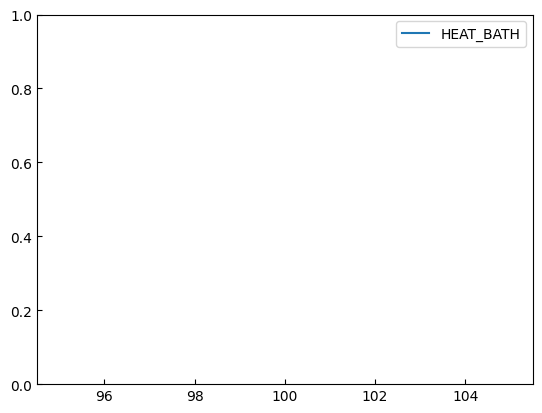

In [9]:
plt.plot(T_list, mag, label="HEAT_BATH")
#plt.plot(T_list, magmag, label="IRKMR")
plt.ylim(0,1)
plt.legend()

In [15]:
magmag = mag